## ORB
ORB (Oriented FAST and Rotated BRIEF) is a feature detection and description algorithm used in computer vision. ORB is designed to efficiently detect and describe keypoints (unique and identifiable location in an image) in images, making it useful for various tasks such as object recognition, tracking, and image stitching.

ORB mixes techniques used in the FAST keypoint detection and the BRIEF descriptor : FAST (Features from Accelerated Segment Test) and BRIEF (Binary Robust Independent Elementary Features).

Before explaining FAST and BRIEF, let’s briefly discuss keypoint detection and feature descriptors. Keypoint detection is all about finding special, easily recognizable spots in an image, while a feature descriptor gives us a numeric summary of what’s around each of those spots.

Now lets talk about the FAST and BRIEF algorithms. FAST is an intensity-based corner detection algorithm used to identify keypoints, and BRIEF is a feature descriptor that generates binary feature descriptors for these keypoints 

## LOGIC
FAST algorithm identifies unique and recognizable keypoints within an image, and then the BRIEF algorithm generates feature descriptors based on these keypoints. These descriptors enable the matching of similar objects across different images . With comparing those descriptors you can create your own custom object tracker

## How Object Tracker Works ?

Imagine you want to track a plane inside a video. First, take your target image (the plane) and find its keypoints and descriptors. Then, for each frame of the video, find keypoints and descriptors. Next, compare the descriptors of the target image with the descriptors of each frame. If there is a match between two , draw shapes at the corresponding coordinates.

## Steps for Object Tracking/Detecting with ORB

1. Choose an image containing only the object you want to detect and track. For instance, if you want to detect a plane, select an image that solely features the plane. Avoid images with multiple objects, such as an airport scene, which may contain distractions like people, cars, and lights. Using such images can result in the FAST algorithm detecting numerous irrelevant keypoints, leading to poor performance of the tracker.

2. After selecting a suitable image, the FAST algorithm identifies unique and recognizable keypoints within the image and BRIEF algorithm generates feature descriptors based on these keypoints. Save keypoints and descriptors of target image.

3. Now read your video( I will use OpenCV) and for each frame, compare the descriptors obtained from the first step with the descriptors extracted from the current frame. If there are matches between some of the descriptor, draw a circle at the coordinates corresponding to the matched descriptors.

Now, I will create an object tracker using the ORB algorithm with the OpenCV library but before that i have one little reminding , you need to aware of when you should not use ORB .

In [1]:
import cv2
import matplotlib.pyplot as plt 
import numpy as np
import time

### Airplane ROI

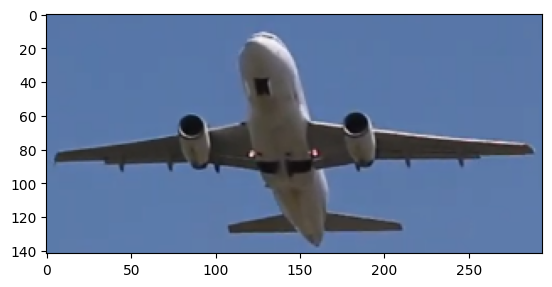

In [2]:
# this is target image 
image = cv2.imread("./images/aeroplane_roi.png")
gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
rgb_image =cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(rgb_image)

### ORB Features

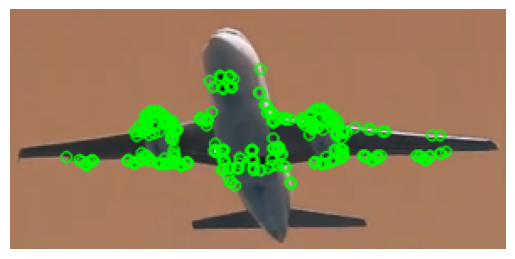

In [3]:
# Initiate ORB
orb = cv2.ORB_create()

# Find keypoints and descriptors with ORB
keypoints, descriptors = orb.detectAndCompute(gray_image, None)

# Draw only keypoints location (not size and orientation)
img_with_keypoints = cv2.drawKeypoints(rgb_image, keypoints, None, color=(0, 255, 0), flags=0)

# Display the image with keypoints
plt.imshow(cv2.cvtColor(img_with_keypoints, cv2.COLOR_BGR2RGB))
plt.axis("off")  # Turn off axis for better visualization
plt.show()

In [4]:
# path to video  
video_path="./images/airplane.mp4"  
video = cv2.VideoCapture(video_path)

In [5]:
# Check if the video opened successfully
if not video.isOpened():
    print("Error: Could not open video.")
    exit()

# Initialize variables for FPS calculation
t0 = time.time()
n_frames = 1

# Get the video width, height, and FPS for output settings
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(video.get(cv2.CAP_PROP_FPS))

# Initialize the VideoWriter object to save the processed video
output_filename = "output_video.mp4"
fourcc = cv2.VideoWriter_fourcc(*"mp4v")  # Codec for .mp4 files
output_video = cv2.VideoWriter(output_filename, fourcc, fps, (frame_width, frame_height))

# Initialize ORB detector
orb = cv2.ORB_create()

# Matcher object (using BFMatcher with default params)
bf = cv2.BFMatcher()

# Read the first frame (assuming this contains the target object)
ret, first_frame = video.read()
if not ret:
    print("Failed to read video")
    video.release()
    cv2.destroyAllWindows()
    exit()

# Convert the first frame to grayscale
first_frame_gray = cv2.cvtColor(first_frame, cv2.COLOR_BGR2GRAY)

# Detect keypoints and compute descriptors for the first frame
keypoints_1, descriptors_1 = orb.detectAndCompute(first_frame_gray, None)

while True:
    # Read next frame from video
    ret, frame = video.read()
    
    if not ret:
        break  # End of video

    # Convert current frame to grayscale
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Compute keypoints and descriptors for the current frame
    keypoints_2, descriptors_2 = orb.detectAndCompute(frame_gray, None)

    # Match descriptors between first frame and current frame
    if descriptors_1 is not None and descriptors_2 is not None:
        matches = bf.match(descriptors_1, descriptors_2)

        # Draw circles on matched keypoints in the current frame
        for match in matches:
            query_idx = match.queryIdx  # Keypoint index from target image
            train_idx = match.trainIdx  # Keypoint index from current frame

            # Get coordinates of matched keypoints
            pt1 = keypoints_1[query_idx].pt
            pt2 = keypoints_2[train_idx].pt

            # Draw circle at pt2 coordinates (current frame keypoints)
            cv2.circle(frame, (int(pt2[0]), int(pt2[1])), 2, (255, 0, 0), 2)

    # FPS calculation
    elapsed_time = time.time() - t0
    avg_fps = n_frames / elapsed_time
    cv2.putText(frame, f"FPS: {avg_fps:.2f}", (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2, cv2.LINE_AA)
    n_frames += 1

    # Write the processed frame to the output video
    output_video.write(frame)

    # Display the frame
    cv2.imshow("coordinate_screen", frame)

    # Exit if ESC key is pressed
    if cv2.waitKey(5) & 0xFF == 27:
        break

# Release resources
video.release()
output_video.release()
cv2.destroyAllWindows()

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread (0x38812b0).
Cannot move to target thread (0x289bda0)

QObject::moveToThread: Current thread (0x289bda0) is not the object's thread